In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from IPython.core.display import display, HTML
tabla=pd.read_excel('NBAstats.xlsx')
%matplotlib inline
tabla.head(20)

,Nombre,Equipo,Edad,Estatura,Salario,Posición,PPP,REP,DEF,%TC,3P%,TL%,APP,TPP
0,K. Walker,Hornets,28,1.85,20000,Base,29.6,4.4,4.1,46.5,38.9,86.0,6.1,0.3
1,S. Curry,Warriors,30,1.90,22000,Base,29.5,5.0,4.5,51.5,49.2,92.3,6.1,0.3
2,L. James,LA Lakers,34,2.03,30000,Alero,28.8,7.7,6.7,52.0,39.6,75.0,7.7,0.9
3,J. Embiid,Philadelphia,24,2.13,45000,Ala Pivot,27.9,13.1,10.9,46.3,31.0,81.1,3.6,2.1
4,J. Harden,Rockets,29,1.96,37000,Base,27.8,5.3,4.8,42.5,35.6,81.5,7.3,0.7
5,A. Davis,New Orleans,25,2.08,24000,Ala Pivot,27.6,12.4,8.9,48.9,35.5,79.7,4.9,2.7
6,K. Durant,Warriors,30,2.06,47000,Alero,27.2,7.2,6.8,50.4,32.4,92.5,6.1,0.8
7,D. Lillard,Blazers,28,1.90,32000,Base,26.6,5.3,4.4,44.1,35.0,92.4,5.3,0.3
8,A. Giannis,Bucks,24,2.11,34000,Alero,25.9,12.7,10.1,55.5,10.5,67.2,5.5,1.4
9,W. Barton,Denver,27,1.98,39500,Escolta,16.5,5.0,4.2,45.2,37.0,80.5,4.1,0.6


In [6]:
posicion = str(input("Seleccione entre Base,Escolta,Alero,AlaPivot,Pivot: "))
print(f"\nHa seleccionado {posicion} ")

if posicion=='Base':
    caracteristicaPosicion='APP'
if posicion=='Escolta':
    caracteristicaPosicion='TPP'
if posicion=='Alero':
    caracteristicaPosicion='REP'
if posicion=='AlaPivot':
    caracteristicaPosicion='PPP'
if posicion=='Pivot':
    caracteristicaPosicion='DEF'

Seleccione entre Base,Escolta,Alero,AlaPivot,Pivot: Alero

Ha seleccionado Alero 


In [14]:
SelectBase=(tabla.loc[tabla['Posición']=='Base'])
MejorBase=SelectBase[SelectBase['APP'] == SelectBase['APP'].max()]

SelectAlero=(tabla.loc[tabla['Posición']=='Alero'])
MejorAlero=SelectAlero[SelectAlero['REP'] == SelectAlero['REP'].max()]

SelectAPivot=(tabla.loc[tabla['Posición']=='Ala Pivot'])
MejorAPivot=SelectAPivot[SelectAPivot['PPP'] == SelectAPivot['PPP'].max()]

SelectEscolta=(tabla.loc[tabla['Posición']=='Escolta'])
MejorEscolta=SelectEscolta[SelectEscolta['TPP'] == SelectEscolta['TPP'].max()]

SelectPivot=(tabla.loc[tabla['Posición']=='Pivot'])
MejorPivot=SelectPivot[SelectPivot['DEF'] == SelectPivot['DEF'].max()]

In [15]:
MejoresJugadores=pd.concat([MejorBase,MejorEscolta,MejorAlero,MejorPivot,MejorAPivot])
SalarioTotal = MejoresJugadores['Salario'].sum()

In [31]:
print("{}{}{}".format("El coste total del mejor equipo es de ", SalarioTotal, " $ "))

El coste total del mejor equipo es de 199500 $ 


In [26]:
MejoresJugadoresTabla=MejoresJugadores[['Nombre','Equipo','Posición','Salario']]
MejoresJugadoresTabla.set_index("Posición", inplace=True)
display(MejoresJugadoresTabla)

,Nombre,Equipo,Salario
Posición,,,
Base,J. Harden,Rockets,37000
Escolta,W. Barton,Denver,39500
Alero,A. Giannis,Bucks,34000
Pivot,D. Jordan,Dallas,44000
Ala Pivot,J. Embiid,Philadelphia,45000


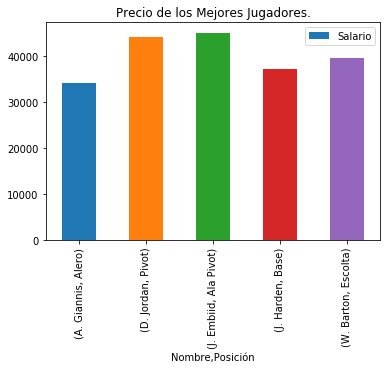

In [32]:
MejoresJugadores.pivot_table(index=['Nombre','Posición']).plot(kind='bar', y='Salario').set_title('Precio de los Mejores Jugadores.');